In [1]:
import pymatgen
from pymatgen.core.composition import Composition as pmcomp
from pymatgen.core.structure import Structure as pmstruc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Extracting data
doping_levels = ["0", "025", "05", "055", "06", "065", "07", "075", "08", "085", "09", "095", "1"]
doping_levels_num = [0, 0.25, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

prefix = "../../relax/POSCAR-d"
suffix = ".vasp"
data = np.array([[], [], [], [], [], [], [], [], []])
for i in range(len(doping_levels)):
    # Parse POSCAR
    fname = prefix + doping_levels[i] + suffix
    struc = pmstruc.from_file(fname)
    
    # Store relevant data
    data = np.hstack([data,[[doping_levels_num[i]], [struc.lattice.a], [struc.lattice.b], 
                            [struc.lattice.c], [struc.get_distance(0,2)], 
                            [struc.get_distance(2,4)], [struc.get_distance(7, 8)], 
                            [struc.get_distance(7, 11)], [struc.get_distance(7, 10)]]])
    
# Add relevant data to dataframe
df = pd.DataFrame(np.transpose(data),columns = ['doping', 'a', 'b', 'c', 'ta-mg', 'ta-ta', 'dO-O1', 'dO-O2', 'dO-O3'])

# Calculating normalized c/a ratio
df['c/a'] = df.apply(lambda row: row.c/(3*row.a), axis=1)

# Calculating dimerization
df['dimer'] = df.apply(lambda row: (row['ta-mg']-row['ta-ta'])/(np.mean([row['ta-mg'],row['ta-ta']])), axis=1)

# Calculation volume
df['vol'] = df['a']**2*df['c']

df

,doping,a,b,c,ta-mg,ta-ta,dO-O1,dO-O2,dO-O3,c/a,dimer,vol
0,0.00,4.775155,4.775155,9.254292,3.072141,3.110010,2.552675,2.998596,2.884750,0.646003,-0.012251,211.017346
1,0.25,4.866340,4.866340,9.322411,3.080582,3.161247,2.562892,3.009706,2.935128,0.638564,-0.025846,220.766458
2,0.50,4.953775,4.953775,9.406409,3.103279,3.199850,2.583198,3.032801,2.980323,0.632946,-0.030642,230.832185
3,0.55,4.969133,4.969133,9.422243,3.108680,3.204883,2.591238,3.037386,2.988952,0.632051,-0.030475,232.656659
4,0.60,4.984681,4.984681,9.441548,3.117154,3.207241,2.608033,3.040695,2.999319,0.631371,-0.028489,234.594552
5,0.65,4.964777,4.964777,9.378115,3.212779,2.952557,2.874254,3.033470,2.982361,0.629643,0.084415,231.161237
6,0.70,4.985493,4.985493,9.373368,3.224212,2.924943,2.910330,3.031589,2.989129,0.626709,0.097337,232.976412
7,0.75,5.008796,5.008796,9.371684,3.235684,2.900316,2.944573,3.029059,2.996753,0.623682,0.109312,235.117198
8,0.80,5.029602,5.029602,9.371827,3.252592,2.866643,2.982750,3.032246,3.000965,0.621111,0.126143,237.078099
9,0.85,5.053137,5.053137,9.378186,3.270406,2.837374,3.018352,3.035742,3.006199,0.618638,0.141797,239.464435


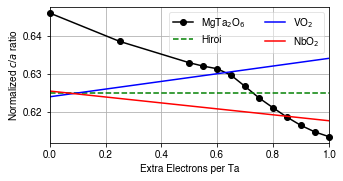

In [14]:
### Plotting c/a ###
WIDTH = 5
HEIGHT = 2.5
YLIMS = None
XLIMS = [0,1]
X_AXIS = 'Extra Electrons per Ta' #Avg. Ta $d$-state'
Y_AXIS = 'Normalized $c$/$a$ ratio'
fig = plt.figure(figsize=(WIDTH,HEIGHT))

plt.plot(df['doping'], df['c/a'], 'ko-',label="MgTa$_2$O$_6$", clip_on=False)
plt.plot([0,1],[0.625,0.625] ,   'g--', label="Hiroi")
plt.plot([0,1],[0.624, 0.6341],  'b-',  label="VO$_2$")
plt.plot([0,1],[0.6255, 0.6177], 'r-',  label="NbO$_2$")


plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(loc='upper right',ncol=2, fancybox=True, framealpha=0.5) 
plt.show()

## Saving plot
fig.savefig('c-a_ratio_cdoped' + '.png', bbox_inches='tight', dpi=500)
fig.savefig('c-a_ratio_cdoped-vec' + '.pdf', bbox_inches='tight')

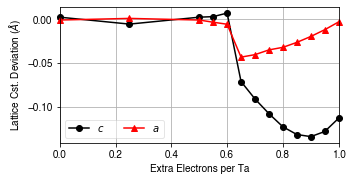

In [15]:
### Plotting c ###
# WIDTH = 4.5
# HEIGHT = 2.5
# YLIMS = None
# XLIMS = [0,1]
# X_AXIS = 'Extra Electrons per Ta' #Avg. Ta $d$-state'
Y_AXIS = 'Lattice Cst. Deviation ($\AA$)'
fig = plt.figure(figsize=(WIDTH,HEIGHT))

for col in ['c', 'a', 'vol']:
    nonmag_x = df['doping'][0:3]
    nonmag_y = df[col][0:3]
    baseline_fit = np.polyfit(nonmag_x, nonmag_y, 1)
    df[col+'_proj'] = np.polyval(baseline_fit, df['doping'])
    df[col+'_norm'] = df[col]-df[col+'_proj']
    
# plt.plot(df['doping'], df['c_norm']/df['c_norm'][0], 'ko-',label="$c$")
# plt.plot(df['doping'], df['a_norm']/df['a_norm'][0], 'r^-',label="$a$")
# plt.plot(df['doping'], df['vol_norm']/df['vol_norm'][0], 'bx-',label="$vol$")
plt.plot(df['doping'], df['c_norm'], 'ko-',label="$c$", clip_on=False)
plt.plot(df['doping'], df['a_norm'], 'r^-',label="$a$", clip_on=False)
# plt.plot(df['doping'], df['vol_norm'], 'bx-',label="$vol$")

plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(loc='best',ncol=2, fancybox=True, framealpha=0.5) 
plt.show()

## Saving plot
fig.savefig('c-a-vol_cdoped' + '.png', bbox_inches='tight', dpi=500)
fig.savefig('c-a-vol_cdoped-vec' + '.pdf', bbox_inches='tight')

In [16]:
df

,doping,a,b,c,ta-mg,ta-ta,dO-O1,dO-O2,dO-O3,c/a,dimer,vol,c_proj,c_norm,a_proj,a_norm,vol_proj,vol_norm
0,0.00,4.775155,4.775155,9.254292,3.072141,3.110010,2.552675,2.998596,2.884750,0.646003,-0.012251,211.017346,9.251646,0.002646,4.775780,-0.000625,210.964577,0.052769
1,0.25,4.866340,4.866340,9.322411,3.080582,3.161247,2.562892,3.009706,2.935128,0.638564,-0.025846,220.766458,9.327704,-0.005293,4.865090,0.001250,220.871996,-0.105538
2,0.50,4.953775,4.953775,9.406409,3.103279,3.199850,2.583198,3.032801,2.980323,0.632946,-0.030642,230.832185,9.403762,0.002646,4.954400,-0.000625,230.779415,0.052769
3,0.55,4.969133,4.969133,9.422243,3.108680,3.204883,2.591238,3.037386,2.988952,0.632051,-0.030475,232.656659,9.418974,0.003269,4.972262,-0.003129,232.760899,-0.104240
4,0.60,4.984681,4.984681,9.441548,3.117154,3.207241,2.608033,3.040695,2.999319,0.631371,-0.028489,234.594552,9.434185,0.007363,4.990124,-0.005443,234.742383,-0.147831
5,0.65,4.964777,4.964777,9.378115,3.212779,2.952557,2.874254,3.033470,2.982361,0.629643,0.084415,231.161237,9.449397,-0.071282,5.007986,-0.043209,236.723867,-5.562629
6,0.70,4.985493,4.985493,9.373368,3.224212,2.924943,2.910330,3.031589,2.989129,0.626709,0.097337,232.976412,9.464609,-0.091241,5.025848,-0.040354,238.705351,-5.728938
7,0.75,5.008796,5.008796,9.371684,3.235684,2.900316,2.944573,3.029059,2.996753,0.623682,0.109312,235.117198,9.479820,-0.108136,5.043710,-0.034913,240.686834,-5.569636
8,0.80,5.029602,5.029602,9.371827,3.252592,2.866643,2.982750,3.032246,3.000965,0.621111,0.126143,237.078099,9.495032,-0.123204,5.061572,-0.031970,242.668318,-5.590219
9,0.85,5.053137,5.053137,9.378186,3.270406,2.837374,3.018352,3.035742,3.006199,0.618638,0.141797,239.464435,9.510243,-0.132057,5.079434,-0.026296,244.649802,-5.185367


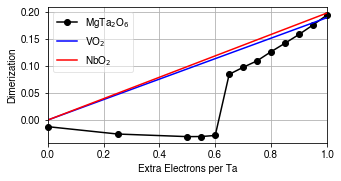

In [17]:
### Plotting dimer ###
# WIDTH = 4.5
# HEIGHT = 2.5
# YLIMS = None
# XLIMS = [0,1]
# X_AXIS = 'Extra Electrons per Ta' #Avg. Ta $d$-state'
Y_AXIS = 'Dimerization'
fig = plt.figure(figsize=(WIDTH,HEIGHT))

def dimer(bonds):
    """
    Calculates the dimerization given two bond lengths
    """
    if len(bonds) != 2:
        raise InvalidArgumentError("Argument must be a list of 2 bond lengths.")
    diff = np.abs(bonds[0] - bonds[1])
    avg = np.mean(bonds)
    return diff/avg

nbo2_bonds = [[3.0315, 3.0315],[3.299, 2.706]]
nbo2_dimers = [dimer(nbo2_bonds[0]),dimer(nbo2_bonds[1])]
vo2_bonds =  [[2.8528, 2.8528],[3.1655, 2.6191]]
vo2_dimers = [dimer(vo2_bonds[0]),dimer(vo2_bonds[1])]


plt.plot(df['doping'], df['dimer'], 'ko-', label="MgTa$_2$O$_6$", clip_on=False)
plt.plot([0,1],        vo2_dimers,  'b-',  label="VO$_2$")
plt.plot([0,1],        nbo2_dimers, 'r-',  label="NbO$_2$")


plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(loc='upper left', fancybox=True, framealpha=0.5) 
plt.show()

## Saving plot
fig.savefig('dimerization_cdoped' + '.png', bbox_inches='tight', dpi=500)
fig.savefig('dimerization_cdoped-vec' + '.pdf', bbox_inches='tight')

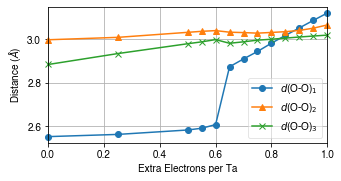

In [18]:
### Plotting O-O distance ###
# WIDTH = 4.5
# HEIGHT = 2.5
# YLIMS = None
# XLIMS = [0,1]
# X_AXIS = 'Extra Electrons per Ta' #Avg. Ta $d$-state'
Y_AXIS = 'Distance ($\AA$)'
fig = plt.figure(figsize=(WIDTH,HEIGHT))

# nbo2_bonds = [[3.0315, 3.0315],[3.299, 2.706]]
# nbo2_dimers = [dimer(nbo2_bonds[0]),dimer(nbo2_bonds[1])]
# vo2_bonds =  [[2.8528, 2.8528],[3.1655, 2.6191]]
# vo2_dimers = [dimer(vo2_bonds[0]),dimer(vo2_bonds[1])]

plt.plot(df['doping'], df['dO-O1'], marker='o', label="$d$(O-O)$_1$", clip_on=False)
plt.plot(df['doping'], df['dO-O2'], marker='^', label="$d$(O-O)$_2$", clip_on=False)
plt.plot(df['doping'], df['dO-O3'], marker='x', label="$d$(O-O)$_3$", clip_on=False)

plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(loc='best', fancybox=True, framealpha=0.5) 
plt.show()

## Saving plot
fig.savefig('OO-bond-lengths_cdoped' + '.png', bbox_inches='tight', dpi=500)